In [5]:
import pandas as pd
import numpy as np



In [11]:
df1=pd.read_excel("C:/Users/maile/Downloads/cleaned_schema_1_data_Final.xlsx")


In [13]:
df2=pd.read_excel("C:/Users/maile/Downloads/cleaned_schema_2_data_Final.xlsx")
df3=pd.read_excel("C:/Users/maile/Downloads/cleaned_schema_3_data_Final.xlsx")


#### Q1. What is the "Probable" COVID-19 rate across different genders?
##### Importance: Health outcomes often differ by sex. This helps identify if one gender was reporting symptoms more frequently in Ontario during April 2020.

In [18]:
gender_risk = df2.groupby('sex')['probable'].mean() * 100
print("\nProbable Case Rate by Sex (%):")
print(gender_risk)


Probable Case Rate by Sex (%):
sex
f     1.766326
m     1.634615
na    1.988636
Name: probable, dtype: float64


#### Q2: Which ethnic groups are most represented in the survey?
##### Importance: Essential for checking "Health Equity." It shows whether the survey reached a diverse population or was limited to specific communities.


 Ethnicity Breakdown 
none         5991
caucasian    4122
asian         832
na            506
hispanic      121
Others        151
dtype: int64


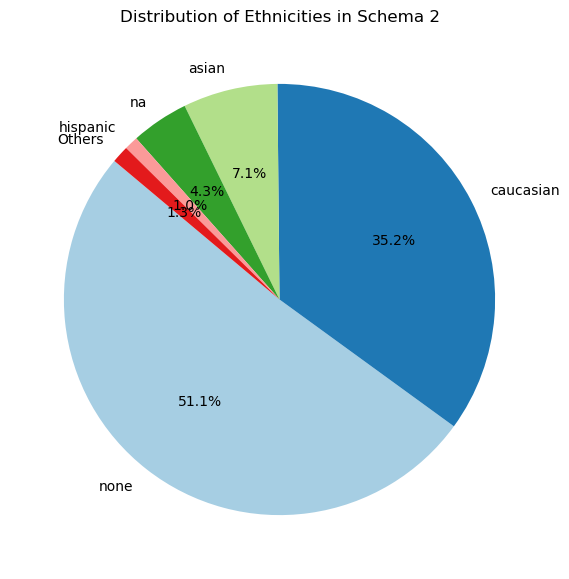

In [28]:
#Ethnicity Breakdown
import matplotlib.pyplot as plt

# 1. Get the full counts of all ethnicities
full_counts = df2['ethnicity'].value_counts()

# 2. Slice the top 5
top_5 = full_counts.head(5)

# 3. Sum everything else into 'Others'
others_count = full_counts.iloc[5:].sum()

# 4. Create the final series for plotting
# We use pd.concat to join the top 5 and the new 'Others' row
others_series = pd.Series({'Others': others_count})
combined_ethnicity = pd.concat([top_5, others_series])

# 5. Descriptive Analysis Output
print("\n Ethnicity Breakdown ")
print(combined_ethnicity)

# 6. Visualization
plt.figure(figsize=(10, 7))
combined_ethnicity.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors,
    title='Distribution of Ethnicities in Schema 2'
)
plt.ylabel('') # Removes the vertical 'ethnicity' label
plt.show()

#### Q3. What are the top 5 symptoms for individuals flagged as "Probable"?
##### Importance: Unlike Schema 1 (which had fixed symptom columns), Schema 2 uses a list. This identifies the specific "symptom signature" of suspected cases.

In [37]:
# Filter for probable cases and expand the semicolon-separated symptom list
probable_cases = df2[df2['probable'] == 1]
symptom_profile = probable_cases['symptoms'].str.get_dummies(sep=';').sum().sort_values(ascending=False)

print("\nMost Common Symptoms in Probable Cases:")
print(symptom_profile.head(5))


Most Common Symptoms in Probable Cases:
none                 94
fever                63
cough                61
soreThroat           55
shortnessOfBreath    53
dtype: int64


#### Q4. How did the reporting volume change from April to July?
##### Importance: This measures "Survey Fatigue." If participation dropped while actual hospital cases rose, it suggests that the app became less effective as a surveillance tool over time.

Survey Submissions per Month:
month
April    5821
May      6698
June     2343
July      672
Name: count, dtype: int64


<Axes: title={'center': 'Public Engagement over Time'}, xlabel='month'>

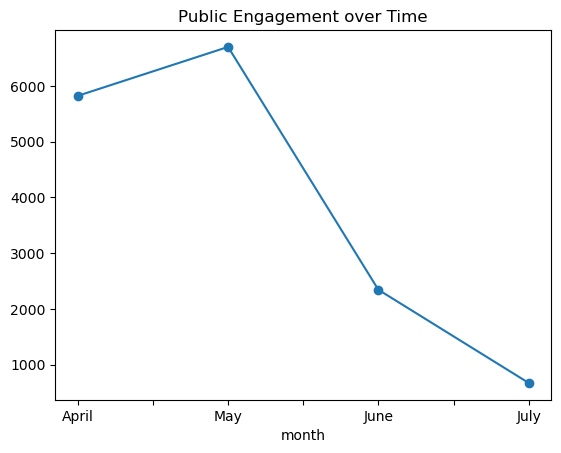

In [48]:
# Count the number of unique survey submissions per month
monthly_engagement = df3['month'].value_counts().reindex(['April', 'May', 'June', 'July'])

print("Survey Submissions per Month:")
print(monthly_engagement)

monthly_engagement.plot(kind='line', marker='o', title='Public Engagement over Time')

#### Q5. What are the top 5 "Hotspot" FSAs (Postal Codes) for probable cases?
##### Importance: Geographic analysis allows for "Precision Public Health"—allocating testing kits and resources to specific neighborhoods rather than the whole province.

In [59]:
# Group by Forward Sortation Area (FSA) and count probable cases
hotspots = df1.groupby('fsa')['probable'].sum().sort_values(ascending=False)

print("Top 5 COVID-19 Hotspot FSAs in Ontario:")
print(hotspots.head(5))

Top 5 COVID-19 Hotspot FSAs in Ontario:
fsa
M5V    221
M5A    134
M6H    110
M4Y    103
M6P    103
Name: probable, dtype: int64


#### Q6. Question 5: Do "Vulnerable" individuals report "Shortness of Breath" more often than others?
##### Importance: Shortness of breath is a severe symptom. Checking if the vulnerable group (elderly/pre-existing conditions) reports this more frequently helps validate the "vulnerable" flag's logic.

In [70]:


# Compare Vulnerable vs Non-Vulnerable
sob_comparison = df3.groupby('vulnerable')['symp_shortnessOfBreath'].mean() * 100

print("Percentage reporting Shortness of Breath:")
print(f"Non-Vulnerable: {sob_comparison[0]:.2f}%")
print(f"Vulnerable: {sob_comparison[1]:.2f}%")

Percentage reporting Shortness of Breath:
Non-Vulnerable: 0.96%
Vulnerable: 1.64%
